In [79]:
import pandas as pa
import matplotlib.pyplot as plt

In [35]:
file = 'revision.csv.gz'


In [5]:
data_iterator = pa.read_csv('revision.csv.gz',header=None,chunksize=400000)

In [6]:
def chunk_filtering(data):
    data.columns = ['id', 'date', 'date_offset', 'committer_date', 'committer_date_offset', 'type', 'directory', 'message', 'author', 'committer']
    
    return data[['id','date']]

In [7]:
chunk_list = []
for data_chunk in data_iterator:
    filterd_chunk = chunk_filtering(data_chunk)
    chunk_list.append(filterd_chunk)
data = pa.concat(chunk_list)

In [8]:
import datetime as dt

In [9]:
data.head()

,id,date
0,\x01714ff5fd94a846f7dc3456a52e6f2dcd36ca0b,2015-04-02T01:11:50.000Z
1,\x01d76a45b817be788eab3e27a93e41c74a6d8957,2010-08-14T17:15:31.000Z
2,\x03ac0bf5d03af97bc7dc7c5aa67d8ee346f8cd1c,2013-09-27T17:02:55.000Z
3,\x05c9110ba2615d42af41a77138bc62dd18278320,2011-10-25T20:11:52.000Z
4,\x06de8d8e88d5b6311ea3feae369c85d157c9dfe3,2017-10-31T20:29:21.000Z


In [10]:
data['date'] = pa.to_datetime(data['date'])

In [11]:
data['date'] = data['date'].dt.date

In [12]:
data.head()

,id,date
0,\x01714ff5fd94a846f7dc3456a52e6f2dcd36ca0b,2015-04-02
1,\x01d76a45b817be788eab3e27a93e41c74a6d8957,2010-08-14
2,\x03ac0bf5d03af97bc7dc7c5aa67d8ee346f8cd1c,2013-09-27
3,\x05c9110ba2615d42af41a77138bc62dd18278320,2011-10-25
4,\x06de8d8e88d5b6311ea3feae369c85d157c9dfe3,2017-10-31


In [13]:
data.groupby('date').count().plot(figsize=(16,9))

In [14]:
data = data[(data['date'] > pa.to_datetime('2008-01-01'))]

In [15]:
f = data.groupby('date').count()

In [16]:
f = f.sort_values(by='id',ascending=False)

In [17]:
f = f[f['id']<5000]

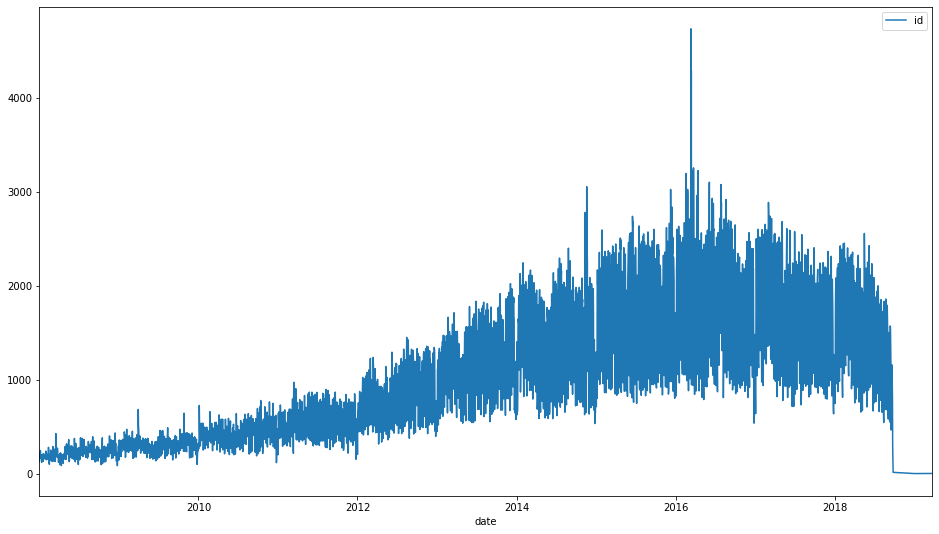

In [80]:
ax = f.plot(kind='line',figsize=(16,9))

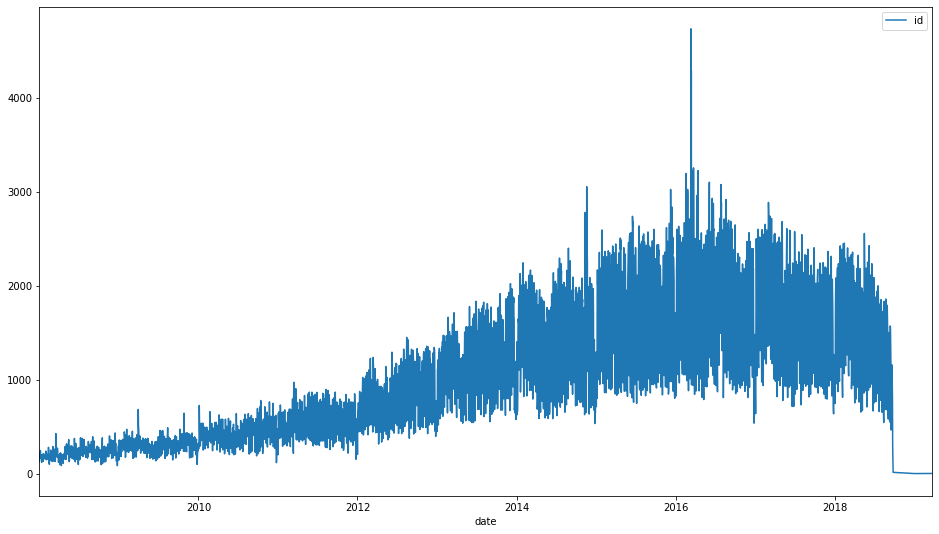

In [21]:
f.interpolate(method='linear', limit_direction='forward', axis=0).plot(figsize=(16,9))

In [20]:
f

,id
date,
2016-03-10,4732
2016-03-12,4288
2016-03-22,3253
2016-03-14,3229
2016-04-12,3224
...,...
2008-04-12,88
2008-12-25,87
2018-09-24,16


In [43]:
f_rel = 'release.csv.gz'

In [60]:
rel = pa.read_csv(f_rel,header=None)

In [61]:
rel.head()

,0,1,2,3,4,5,6
0,\xae671a0067dbeabbc3cb546705edc1f81f71a193,\xaa2406d3c8d2ab98ad5899406622b30fb66741d5,2015-02-03T21:58:44.000Z,-300,\x72656c656173652d323031352d30322d3034,\x52656c6561736520666f722046656272756172792034...,91949
1,\x33e2c27d1ec224a54ed7ca4a6e09c352e92a227d,\xdbfd0e0f6319809f41802088338ad0a1c5af5890,2013-07-05T04:58:14.000Z,480,\x76302e32392e31,\x7461672076657273696f6e20302e32392e310a,140982
2,\x1f9bcd823807f41afaab6b74b34473531ca7eb30,\x6c6b72f3a38771792717857c914b976a1a5187cb,2013-03-29T13:02:20.000Z,-240,\x76332e302e30,\x576861742773206e657720696e20546f726e61646f20...,207066
3,\x3206fb28a040494bac6973310e7f21f031989da6,\x10688579d757bd87fc709189813bdf1a66e780d3,2010-12-09T04:14:19.000Z,-420,\x6275696c642d343639,\x57696e646f7773206275696c64205369636b42656172...,875380
4,\x652fc27cf9fe9262d2c941d6385043efa41016da,\xdc983cd294d5f8101e3177afacf997cb71c24ccb,2011-11-08T01:22:48.000Z,-480,\x312e312e36,\x46616272696320312e312e360a,63770


In [62]:
rel.columns = ['id', 'target', 'date', 'date_offset', 'name', 'comment', 'author']

In [63]:
rel.head()

,id,target,date,date_offset,name,comment,author
0,\xae671a0067dbeabbc3cb546705edc1f81f71a193,\xaa2406d3c8d2ab98ad5899406622b30fb66741d5,2015-02-03T21:58:44.000Z,-300,\x72656c656173652d323031352d30322d3034,\x52656c6561736520666f722046656272756172792034...,91949
1,\x33e2c27d1ec224a54ed7ca4a6e09c352e92a227d,\xdbfd0e0f6319809f41802088338ad0a1c5af5890,2013-07-05T04:58:14.000Z,480,\x76302e32392e31,\x7461672076657273696f6e20302e32392e310a,140982
2,\x1f9bcd823807f41afaab6b74b34473531ca7eb30,\x6c6b72f3a38771792717857c914b976a1a5187cb,2013-03-29T13:02:20.000Z,-240,\x76332e302e30,\x576861742773206e657720696e20546f726e61646f20...,207066
3,\x3206fb28a040494bac6973310e7f21f031989da6,\x10688579d757bd87fc709189813bdf1a66e780d3,2010-12-09T04:14:19.000Z,-420,\x6275696c642d343639,\x57696e646f7773206275696c64205369636b42656172...,875380
4,\x652fc27cf9fe9262d2c941d6385043efa41016da,\xdc983cd294d5f8101e3177afacf997cb71c24ccb,2011-11-08T01:22:48.000Z,-480,\x312e312e36,\x46616272696320312e312e360a,63770


In [64]:
rel = rel[['date','id']]

In [65]:
rel['date'] = pa.to_datetime(rel['date']).dt.date

In [66]:
rel =rel.groupby('date').count()

In [73]:
rel = rel.sort_values(by='id',ascending=False)

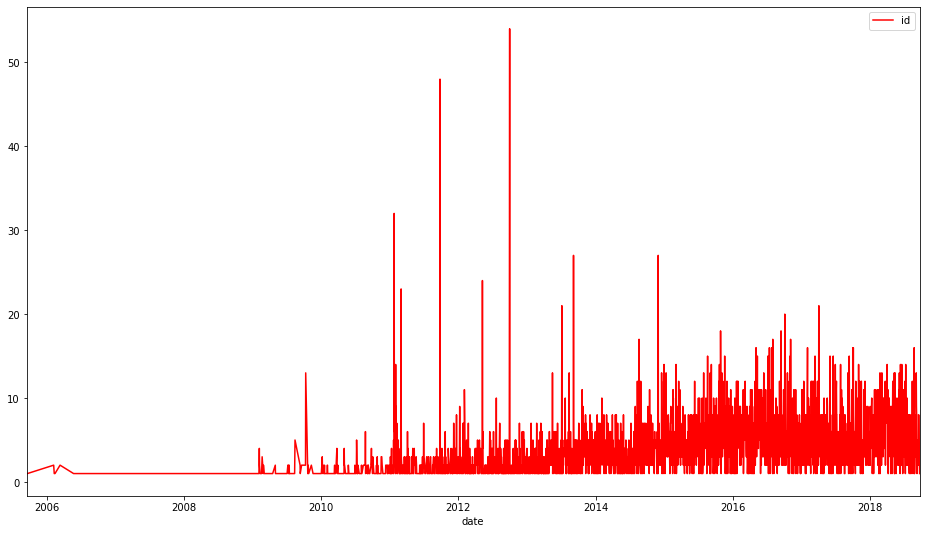

In [78]:
rel.plot(figsize=(16,9),color='r')

In [88]:
plt.rcParams["figure.figsize"] = [16,9]

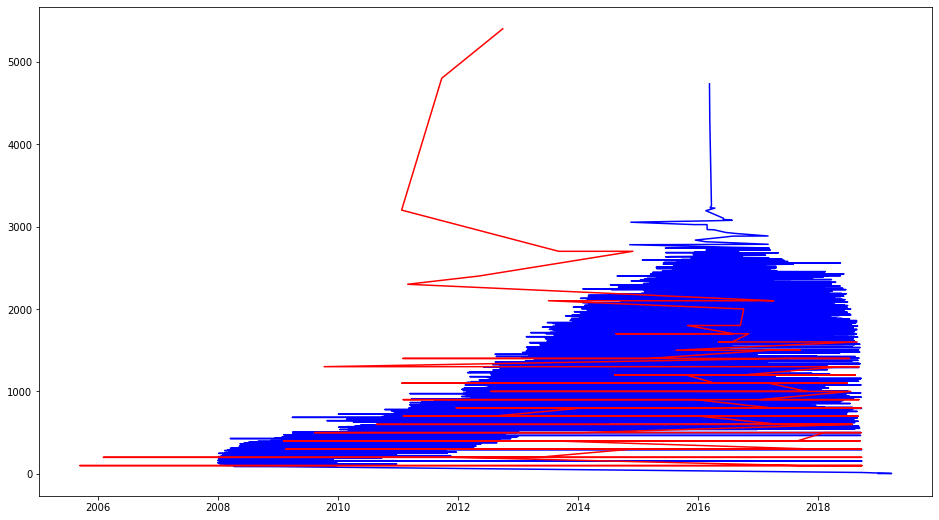

In [92]:
plt.plot(f.index,f.id ,'b')
plt.plot(rel.index,rel.id * 100,'r')